In [65]:
from pymatgen.phonon.plotter import PhononBSPlotter

import matplotlib.pyplot as plt
import numpy as np

from pymatgen.ext.matproj import MPRester
with MPRester("Os4JHJeA2G7FbSIy4") as m:
    # Bandstructure for material id
    bandstructure = m.get_phonon_bandstructure_by_material_id("mp-568662")
    # This object stores phonon band structures along selected (symmetry) lines in the Brillouin zone. 
    
print("Le matériau analysé est le BaCl2")

Le matériau analysé est le BaCl2


# Graphique des bandes de phonons

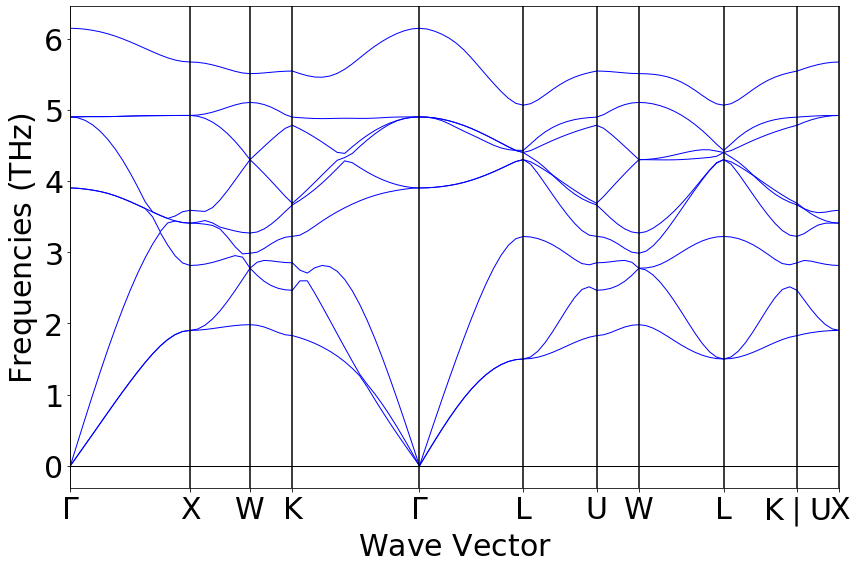

In [66]:
c = PhononBSPlotter(bandstructure)
im = c.get_plot()

im.show()

In [81]:
# les donnees contenues dans le graphe
data = c.bs_plot_data()
distance = data.get("distances")
frequency = data.get("frequency")

# Calcul de la vitesse du son

La vitesse du son peut être calculée à l'aide de:  $\frac{\partial \omega}{\partial q}$ 
* $\omega$ est la fréquence angulaire
* q est le vecteur d'onde


In [68]:
# Afin de calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions differentes :
# Tout d'abord, le PhononBSPlotter garantit d'être dans la zone de Brillouin.
# Ensuite, la procédure a effectué 3 fois est la suivante : 
# Je choisis une direction et une branche via "frenquency[direction][branche]"
# Je calcule la distance et la frequence pour pouvoir utiliser la relation entre la vitesse, frequence ANGULAIRE 
# et vecteur d'onde. 
# Attention : la frequence est en THz et les distances en angstroms. Il faut donc proceder a un changement d'unite
# pour obtenir la vitesse en [m/s]

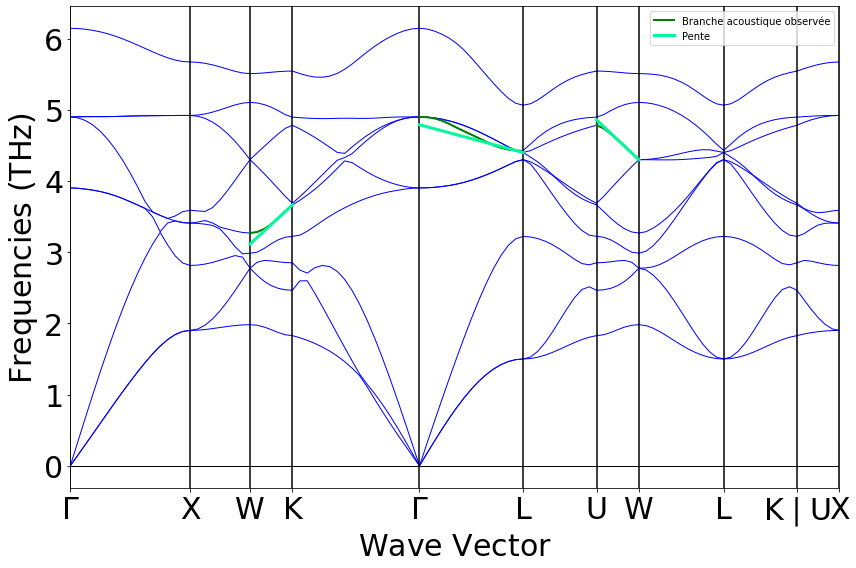

In [76]:
# trois branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin
branche = [0,0,0]
branche[0] = frequency[2][4]
branche[1] = frequency[4][5]
branche[2] = frequency[6][6]
# les trois directions
q = [0,0,0]
q[0] = distance[2]
q[1] = distance[4]
q[2] = distance[6]
# initialisation des donnees
deriv = [0,0,0]
dwdx = [0,0,0]
son = [0,0,0] 

# Calcul des vitesses du son 
for i in range(3) : 
        deriv[i] = np.gradient(branche[i], q[i][1]-q[i][0])
        dwdx[i] = np.add(np.multiply(np.array(q[i]), np.array(deriv[i][-1])), 
                  np.add(-np.multiply(np.array(q[i][-1]), np.array(deriv[i][-1])), np.array(branche[i][-1])))
        son[i] = np.abs((2*np.pi*(dwdx[i][-1]-dwdx[i][0])*10**12)/((q[i][-1]-q[i][0])*10**(10)))

# Verification graphique
c.get_plot()

for i in range(3):    
    if i == 0 : 
        plt.plot(q[i], branche[i], color= "green", linewidth = 2, label = "Branche acoustique observée")
        plt.plot(q[i], dwdx[i], color="mediumspringgreen", linewidth = 3, label = "Pente")
    else : 
        plt.plot(q[i], branche[i], linewidth = 2, color= "green")
        plt.plot(q[i], dwdx[i], linewidth = 3, color="mediumspringgreen")

plt.legend()
plt.show()

In [80]:
print("La vitesse du son dans la direction W-K pour la branche 5 = ", son[0], "[m/s]")
print("La vitesse du son dans la direction Γ-L pour la branche 6 = ", son[1], "[m/s]")
print("La vitesse du son dans la direction U-W pour la branche 7 = ", son[2], "[m/s]")

La vitesse du son dans la direction W-K pour la branche 5 =  1127.2386624147555 [m/s]
La vitesse du son dans la direction Γ-L pour la branche 6 =  325.92890795383704 [m/s]
La vitesse du son dans la direction U-W pour la branche 7 =  1145.1313088643308 [m/s]
